## Figure 4: 

Time evolution of (a) total precipitation rate and (b) total cloud cover for different treatments of cloud-radiative heating. The dashed lines denote the difference of the CRH and 2xCRH simulations with respect to the REF simulation. For the differences, the right y-axis is used.
 
---
@ Behrooz Keshtgar, KIT 2022

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import colorlegend
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.19.1
matplotlib: 3.3.0


## 2- Loading dataset

In [3]:
# Dictionary for loading simulations
simdict = {
         'LC1-channel-4000x9000km-2km-0002' : {'res':'2km', 'radiation':0, 'rh':0.8}, # No radiation
         'LC1-channel-4000x9000km-2km-0003' : {'res':'2km', 'radiation':1, 'rh':0.8}, # Cloud radiation
         'LC1-channel-4000x9000km-2km-0004' : {'res':'2km', 'radiation':1, 'rh':0.8}, # 2x Cloud radiation
             }

In [4]:
# loading 2d datasets
def load_simulations():
    ds_list = []
    for sim in list(simdict.keys()): 
        
        print('Working on loading data for', sim)
        # loading remapped datasets (0.5x0.5 r)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        fname = path+'icon-atm2d*.nc'                                                                     
        ds_var = xr.open_mfdataset(fname)[['tot_prec','clct']].sel(time=slice(20210101,20210110))
        ds_list.append(ds_var)
        del fname,ds_var

    return ds_list
#----------------------------------
ds_list_atm2d = load_simulations()

Working on loading data for LC1-channel-4000x9000km-2km-0002
Working on loading data for LC1-channel-4000x9000km-2km-0003
Working on loading data for LC1-channel-4000x9000km-2km-0004


## 3- Domain mean of cloud cover and precipitation rate

In [5]:
# total precipitation rate
for i in range(len(ds_list_atm2d)):
    ds_list_atm2d[i]['tot_prec_rate'] = ds_list_atm2d[i]['tot_prec'].diff(dim='time', label='upper') #mm/hr

# taking domain mean and excluding boundaries    
for var in ['tot_prec_rate','clct','tot_prec']:
    for i in range(len(ds_list_atm2d)):
        ds_list_atm2d[i]['d_mean'+'_'+var] = ds_list_atm2d[i][var].sel(lat=slice(10,70)).mean(dim=['lat','lon']).compute()
        # finding 99th percentile of total precipitation using all grid points in the domain
        if var == 'tot_prec_rate':
            ds_list_atm2d[i]['99th'+'_'+var] = ds_list_atm2d[i]['tot_prec_rate'].quantile(.99, dim=['lat','lon']).compute()

In [6]:
# diffrences with respect to the REF simulation
for var in ['d_mean_clct','d_mean_tot_prec_rate','99th_tot_prec_rate']:
    for i in range(len(ds_list_atm2d)-1):
        ds_list_atm2d[i+1]['diff'+'_'+var] = ds_list_atm2d[i+1][var]-ds_list_atm2d[0][var]

## 4- Plot

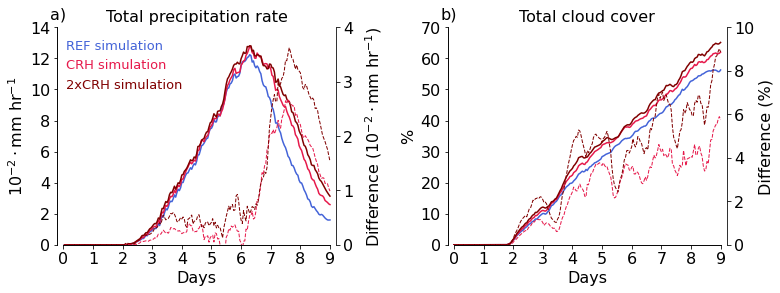

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

i = 0

for ax in axes.flat:
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    ax.spines['bottom'].set_bounds(0,216)
    ax.set_xticks(np.arange(0,217,24))
    ax.set_xticklabels(["0","1", "2", "3", "4", "5","6","7","8","9"])
    ax.set_xlim([-5, 216])
    
    ax.tick_params(labelsize=16)
    
    if i == 0:
        ax.plot(ds_list_atm2d[0]['d_mean_tot_prec_rate']*1e2,'#4363d8',label="REF simulation",linewidth=1.5)
        ax.plot(ds_list_atm2d[1]['d_mean_tot_prec_rate']*1e2,'#e6194B',label="CRH simulation",linewidth=1.5)
        ax.plot(ds_list_atm2d[2]['d_mean_tot_prec_rate']*1e2,'#800000',label="2xCRH simulation",linewidth=1.5)

        lg=colorlegend.color_legend(ax,loc=2,fsize=13)

        ax.set_title('Total precipitation rate',fontsize=16)
        ax.set_xlabel('Days',fontsize=16)
        ax.set_ylabel('$10^{-2} \cdot $mm hr$^{-1}$',fontsize=16)
        
        ax.spines['left'].set_bounds(0,14)
        ax.set_yticks(np.arange(0,16,2))
        ax.set_ylim([0, 14])

        ax.text(-0.025, 1.04, 'a)', transform=ax.transAxes, 
                    size=16 )
        
        # second axis for differences
        ax2 = ax.twinx()
        ax2.spines['top'].set_color('none')
        ax2.tick_params(labelsize=16)

        ax2.plot(ds_list_atm2d[1]['diff_d_mean_tot_prec_rate']*1e2,'#e6194B',linewidth=1,linestyle='--')
        ax2.plot(ds_list_atm2d[2]['diff_d_mean_tot_prec_rate']*1e2,'#800000',linewidth=1,linestyle='--')

        ax2.set_ylabel('Difference ($10^{-2} \cdot $mm hr$^{-1}$)',fontsize=16,labelpad=10)

        ax2.spines['bottom'].set_bounds(0,216)
        ax2.set_xticks(np.arange(0,217,24))
        ax2.set_xticklabels(["0","1", "2", "3", "4", "5","6","7","8","9"])
        ax2.set_xlim([-5, 221])

        ax2.spines['right'].set_bounds(0,4)
        ax2.set_yticks(np.arange(0,5,1))
        ax2.set_ylim([0, 4])
    
    if i == 1:
        
        ax.plot(ds_list_atm2d[0]['d_mean_clct'],'#4363d8',label="No Radiation",linewidth=1.5)
        ax.plot(ds_list_atm2d[1]['d_mean_clct'],'#e6194B',label="Cloud Radiation",linewidth=1.5)
        ax.plot(ds_list_atm2d[2]['d_mean_clct'],'#800000',label="2x Cloud Radiation",linewidth=1.5)

        ax.set_title('Total cloud cover',fontsize=16)
        ax.set_xlabel('Days',fontsize=16)
        ax.set_ylabel('%',fontsize=16)

        ax.spines['left'].set_bounds(0,70)
        ax.set_yticks(np.arange(0,80,10))
        ax.set_ylim([0, 70])

        ax.text(-0.025, 1.04, 'b)', transform=ax.transAxes, 
                    size=16 )

        # second axis for differences
        ax2 = ax.twinx()
        ax2.spines['top'].set_color('none')
        ax2.tick_params(labelsize=16)

        ax2.plot(ds_list_atm2d[1]['diff_d_mean_clct'],'#e6194B',linewidth=1,linestyle='--')
        ax2.plot(ds_list_atm2d[2]['diff_d_mean_clct'],'#800000',linewidth=1,linestyle='--')

        ax2.set_ylabel('Difference (%)',fontsize=16)

        ax2.spines['bottom'].set_bounds(0,216)
        ax2.set_xticks(np.arange(0,217,24))
        ax2.set_xticklabels(["0","1", "2", "3", "4", "5","6","7","8","9"])
        ax2.set_xlim([-5, 221])

        ax2.spines['right'].set_bounds(0,10)
        ax2.set_yticks(np.arange(0,12,2))
        ax2.set_ylim([0, 10])
        
    i = i + 1    

fig.subplots_adjust(wspace=0.4)
plt.savefig('figure4.pdf', bbox_inches = 'tight')